#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Importing CSV file data to data frame

In [2]:
df=pd.read_csv("C:/Users/akash/Desktop/Scaler/Case_Study/walmart.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2.0,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2.0,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2.0,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2.0,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4.0,0.0,8.0,7969.0


#### Checking datatypes for the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500423 entries, 0 to 500422
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     500423 non-null  int64  
 1   Product_ID                  500423 non-null  object 
 2   Gender                      500422 non-null  object 
 3   Age                         500422 non-null  object 
 4   Occupation                  500422 non-null  float64
 5   City_Category               500422 non-null  object 
 6   Stay_In_Current_City_Years  500422 non-null  float64
 7   Marital_Status              500422 non-null  float64
 8   Product_Category            500422 non-null  float64
 9   Purchase                    500422 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 38.2+ MB


In [5]:
df['Stay_In_Current_City_Years'].value_counts()

1.0    176166
2.0     92636
3.0     86732
4.0     77157
0.0     67731
Name: Stay_In_Current_City_Years, dtype: int64

#### Changing the categorical values to object

In [6]:
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['User_ID'] = df['User_ID'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500423 entries, 0 to 500422
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     500423 non-null  object 
 1   Product_ID                  500423 non-null  object 
 2   Gender                      500422 non-null  object 
 3   Age                         500422 non-null  object 
 4   Occupation                  500422 non-null  float64
 5   City_Category               500422 non-null  object 
 6   Stay_In_Current_City_Years  500422 non-null  object 
 7   Marital_Status              500422 non-null  object 
 8   Product_Category            500422 non-null  object 
 9   Purchase                    500422 non-null  float64
dtypes: float64(2), object(8)
memory usage: 38.2+ MB


#### Checking for null values

In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
500422,1005061,P0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It seems like only one row have all null values so removing that row.

In [10]:
index = df[df['User_ID'] == 1005061].index
df.drop(index,inplace=True)

In [11]:
df[df.isna().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [12]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,500325.0,500325,500325,500325,500325.000000,500325,500325.0,500325.0,500325.0,500325.000000
unique,5890.0,3612,2,7,NaN,3,5.0,2.0,18.0,NaN
top,1001680.0,P00265242,M,26-35,NaN,B,1.0,0.0,5.0,NaN
freq,952.0,1710,377343,199533,NaN,210817,176166.0,295765.0,138315.0,NaN
mean,NaN,NaN,NaN,NaN,8.082135,NaN,NaN,NaN,NaN,9331.870026
std,NaN,NaN,NaN,NaN,6.523247,NaN,NaN,NaN,NaN,4980.248218
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,185.000000
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,5866.000000
50%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,8061.000000
75%,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,12071.000000


#### Purchase seems to have outliers as median and mean have a big difference.

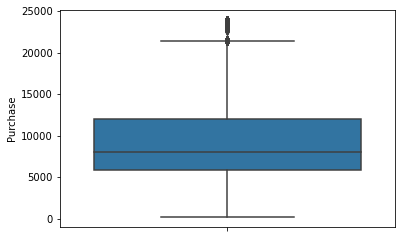

In [13]:
sns.boxplot(y='Purchase',data=df)
plt.show()

In [14]:
upper_bound = (1.5 * stats.iqr(df['Purchase'])) + np.quantile(df['Purchase'],0.75)
print("Percentage of Outliers in Purchase Column is %s" %((len(df[df['Purchase'] >= upper_bound])/len(df))*100))

Percentage of Outliers in Purchase Column is 0.49947534102833163


As outliers are only 0.5 percent so dropping it from dataset.

In [15]:
drop = df[df['Purchase'] >= upper_bound].index
df.drop(drop,inplace=True)

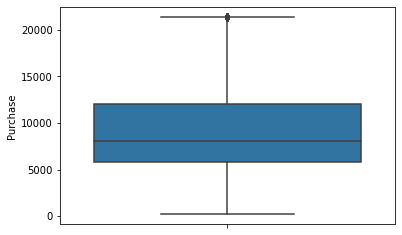

In [16]:
sns.boxplot(y='Purchase',data=df)
plt.show()

### City 

In [17]:
df['City_Category'].value_counts()

B    209829
C    154042
A    133955
Name: City_Category, dtype: int64

#### Male customers have slight high spending than female customers per transaction in all city category. 

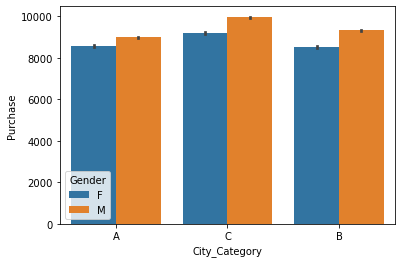

In [106]:
sns.barplot(x = 'City_Category' , y = 'Purchase' , hue = 'Gender' , data = df)
plt.show()

#### Marital Status doesnt seems to affect the customer purchase as per this data.

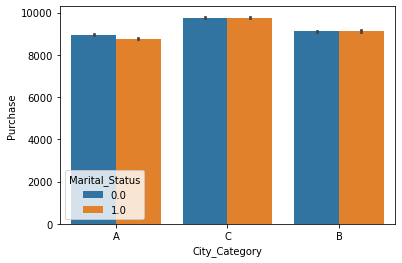

In [19]:
sns.barplot(x = 'City_Category' , y = 'Purchase' , hue = 'Marital_Status' , data = df)
plt.show()

#### Category of City B retains most people as we see the graph we are clearly able to see that in each stay in current city years B category city tops other categories.

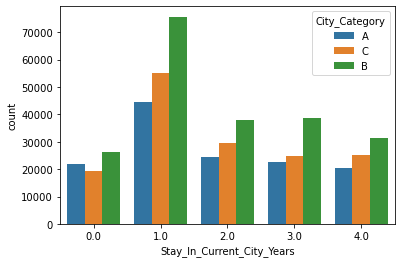

In [20]:
sns.countplot(x = 'Stay_In_Current_City_Years' , hue = 'City_Category' , data = df)
plt.show()

### Confidence Intervals for true mean Purchase
#### For all transactions

In [21]:
df.shape

(497826, 10)

In [22]:
size = int(.8*len(df))
r = 10000
transactions_mean = np.empty(r)
for i in range(r):
    sample = df['Purchase'].sample(n = size,replace = True)
    transactions_mean[i] = np.mean(sample)

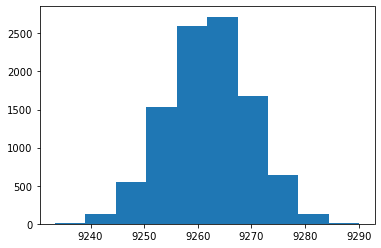

In [30]:
plt.hist(transactions_mean)
plt.show()

In [23]:
def interval(percent,sample_means):
    mean = sample_means.mean()
    std = sample_means.std()
    diff = norm.ppf(percent)*std
    upper = mean + diff
    lower = mean - diff
    return(lower,upper)

In [24]:
print("Confidence Interval for 90 percent is (%.2f , %.2f)" %interval(.95,transactions_mean))
print("Confidence Interval for 95 percent is (%.2f , %.2f)" %interval(.975,transactions_mean))
print("Confidence Interval for 99 percent is (%.2f , %.2f)" %interval(.995,transactions_mean))

Confidence Interval for 90 percent is (9249.21 , 9274.93)
Confidence Interval for 95 percent is (9246.75 , 9277.39)
Confidence Interval for 99 percent is (9241.93 , 9282.21)


#### For transactions done by Male Customers

In [31]:
Male = df[df['Gender'] == 'M']['Purchase']
len(Male)

375385

In [32]:
size = int(.8*len(Male))
r = 100000
transactions_mean_male = np.empty(r)
for i in range(r):
    sample = Male.sample(n = size,replace = True)
    transactions_mean_male[i] = np.mean(sample)

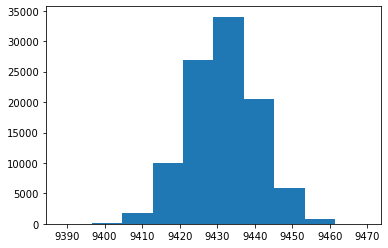

In [33]:
plt.hist(transactions_mean_male)
plt.show()

In [34]:
print("Confidence Interval for 90 percent is (%.2f , %.2f)" %interval(.95,transactions_mean_male))
print("Confidence Interval for 95 percent is (%.2f , %.2f)" %interval(.975,transactions_mean_male))
print("Confidence Interval for 99 percent is (%.2f , %.2f)" %interval(.995,transactions_mean_male))

Confidence Interval for 90 percent is (9416.72 , 9446.53)
Confidence Interval for 95 percent is (9413.87 , 9449.38)
Confidence Interval for 99 percent is (9408.29 , 9454.96)


#### For transactions done by Female Customers

In [35]:
Female = df[df['Gender'] == 'F']['Purchase']
len(Female)

122441

In [36]:
size = int(.8*len(Female))
r = 100000
transactions_mean_female = np.empty(r)
for i in range(r):
    sample = Female.sample(n = size,replace = True)
    transactions_mean_female[i] = np.mean(sample)

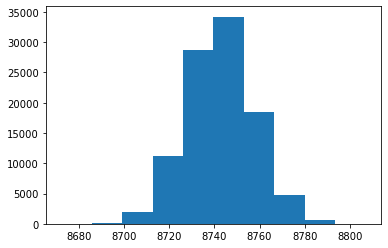

In [37]:
plt.hist(transactions_mean_female)
plt.show()

In [38]:
print("Confidence Interval for 90 percent is (%.2f , %.2f)" %interval(.95,transactions_mean_female))
print("Confidence Interval for 95 percent is (%.2f , %.2f)" %interval(.975,transactions_mean_female))
print("Confidence Interval for 99 percent is (%.2f , %.2f)" %interval(.995,transactions_mean_female))

Confidence Interval for 90 percent is (8718.13 , 8766.94)
Confidence Interval for 95 percent is (8713.45 , 8771.62)
Confidence Interval for 99 percent is (8704.32 , 8780.75)


#### Men vs Women 

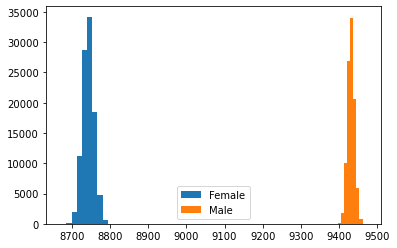

In [88]:
plt.hist(transactions_mean_female , label='Female')
plt.hist(transactions_mean_male , label = 'Male')
plt.legend(loc = 'best')
plt.show()

#### For transactions done by Married Customers

In [39]:
married=df[df['Marital_Status'] == 1 ]['Purchase']
len(married)

203455

In [40]:
size = int(.8*len(married))
r = 100000
transactions_mean_married = np.empty(r)
for i in range(r):
    sample = married.sample(n = size,replace = True)
    transactions_mean_married[i] = np.mean(sample)

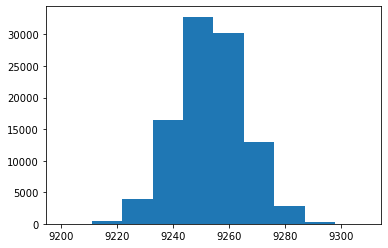

In [41]:
plt.hist(transactions_mean_married)
plt.show()

In [42]:
print("Confidence Interval for 90 percent is (%.2f , %.2f)" %interval(.95,transactions_mean_married))
print("Confidence Interval for 95 percent is (%.2f , %.2f)" %interval(.975,transactions_mean_married))
print("Confidence Interval for 99 percent is (%.2f , %.2f)" %interval(.995,transactions_mean_married))

Confidence Interval for 90 percent is (9233.42 , 9273.39)
Confidence Interval for 95 percent is (9229.60 , 9277.21)
Confidence Interval for 99 percent is (9222.11 , 9284.69)


#### For transactions done by Single (Marital Status) Customers

In [43]:
single=df[df['Marital_Status'] == 0 ]['Purchase']
len(single)

294371

In [44]:
size = int(.8*len(single))
r = 100000
transactions_mean_single = np.empty(r)
for i in range(r):
    sample = single.sample(n = size,replace = True)
    transactions_mean_single[i] = np.mean(sample)

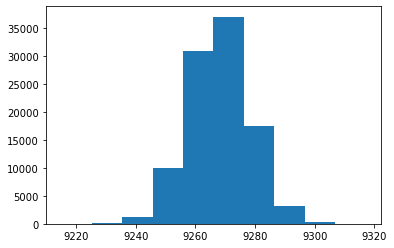

In [45]:
plt.hist(transactions_mean_single)
plt.show()

In [46]:
print("Confidence Interval for 90 percent is (%.2f , %.2f)" %interval(.95,transactions_mean_single))
print("Confidence Interval for 95 percent is (%.2f , %.2f)" %interval(.975,transactions_mean_single))
print("Confidence Interval for 99 percent is (%.2f , %.2f)" %interval(.995,transactions_mean_single))

Confidence Interval for 90 percent is (9251.41 , 9284.74)
Confidence Interval for 95 percent is (9248.22 , 9287.94)
Confidence Interval for 99 percent is (9241.98 , 9294.18)


#### we have a overlapping in married and signle customers sampling distributions as well as in CI , As the CI not have much difference we dont have a way of saying it definite that which true mean will be high. 
##### For Married
- Confidence Interval for 90 percent is (9233.42 , 9273.39)
- Confidence Interval for 95 percent is (9229.60 , 9277.21)
- Confidence Interval for 99 percent is (9222.11 , 9284.69)

##### For Single
- Confidence Interval for 90 percent is (9251.41 , 9284.74)
- Confidence Interval for 95 percent is (9248.22 , 9287.94)
- Confidence Interval for 99 percent is (9241.98 , 9294.18)

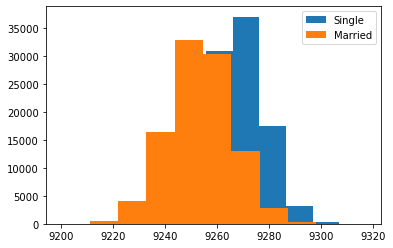

In [107]:
plt.hist(transactions_mean_single , label = 'Single')
plt.hist(transactions_mean_married, label = 'Married')
plt.legend(loc = 'best')
plt.show()

###  Age 

In [47]:
df['Age'].value_counts()

26-35    198668
36-45     99694
18-25     90540
46-50     41226
51-55     34764
55+       19322
0-17      13612
Name: Age, dtype: int64

#### Most Customers are in age group of 18-45

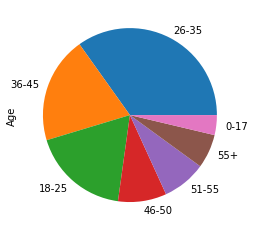

In [55]:
temp = df[['User_ID','Age',]]
temp.drop_duplicates(inplace = True)
temp['Age'].value_counts().plot(kind='pie')
plt.show()

In [102]:
def f(x):
    temp = x['Product_ID'].value_counts().reset_index()
    return temp[temp['Product_ID'] == max(temp['Product_ID'])]

#### Most of our customer base is interested in this product P00265242

In [104]:
temp = df.groupby('Age').apply(f)
temp

,,index,Product_ID
Age,,,
0-17,0,P00255842,63
18-25,0,P00265242,357
26-35,0,P00265242,669
36-45,0,P00025442,320
46-50,0,P00265242,125
51-55,0,P00265242,130
55+,0,P00265242,97


In [105]:
temp = df.groupby('Gender').apply(f)
temp

,,index,Product_ID
Gender,,,
F,0,P00265242,457
M,0,P00265242,1253


In [50]:
def age_func(age_bin):
    r = 100000
    age = df[df['Age'] == age_bin]['Purchase']
    size = int(0.8*len(age))
    age_SampleMean = np.empty(r)
    for i in range(r):
        sample = age.sample(n = size , replace = True)
        age_SampleMean[i] = np.mean(sample)
    return age_SampleMean

In [57]:
l = df['Age'].unique()
age_SampleMean = {}
for i in l:
    age_SampleMean[i] = age_func(i)

0-17


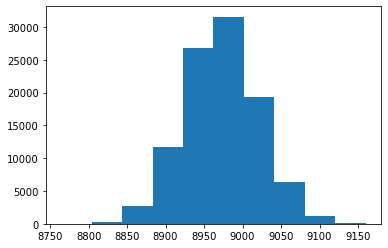

55+


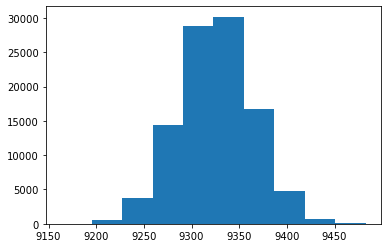

26-35


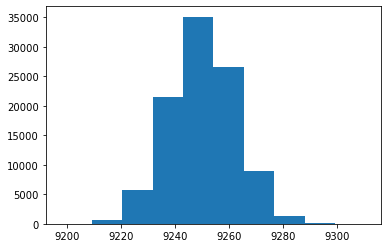

46-50


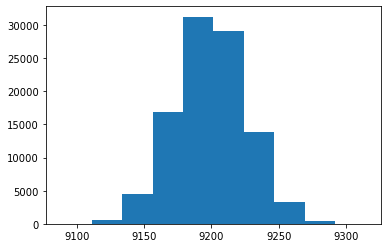

51-55


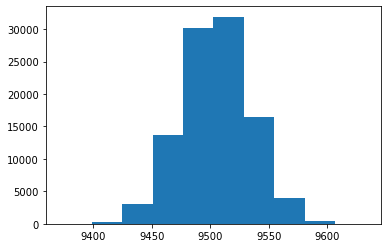

36-45


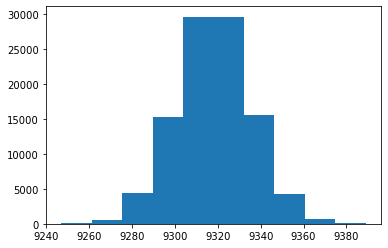

18-25


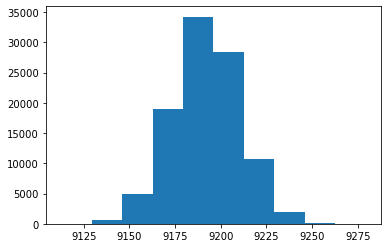

In [63]:
for i in l:
    print(i)
    plt.hist(age_SampleMean[i])
    plt.show()

In [64]:
for i in l:
    print(i)
    print("Confidence Interval for 90 percent is (%.2f , %.2f)" %interval(.95,age_SampleMean[i]))
    print("Confidence Interval for 95 percent is (%.2f , %.2f)" %interval(.975,age_SampleMean[i]))
    print("Confidence Interval for 99 percent is (%.2f , %.2f)" %interval(.995,age_SampleMean[i])) 

0-17
Confidence Interval for 90 percent is (8893.92 , 9051.30)
Confidence Interval for 95 percent is (8878.85 , 9066.38)
Confidence Interval for 99 percent is (8849.39 , 9095.84)
55+
Confidence Interval for 90 percent is (9261.91 , 9388.72)
Confidence Interval for 95 percent is (9249.76 , 9400.87)
Confidence Interval for 99 percent is (9226.02 , 9424.61)
26-35
Confidence Interval for 90 percent is (9230.03 , 9270.32)
Confidence Interval for 95 percent is (9226.17 , 9274.18)
Confidence Interval for 99 percent is (9218.63 , 9281.72)
46-50
Confidence Interval for 90 percent is (9155.84 , 9242.85)
Confidence Interval for 95 percent is (9147.51 , 9251.19)
Confidence Interval for 99 percent is (9131.22 , 9267.48)
51-55
Confidence Interval for 90 percent is (9456.48 , 9553.20)
Confidence Interval for 95 percent is (9447.21 , 9562.47)
Confidence Interval for 99 percent is (9429.10 , 9580.57)
36-45
Confidence Interval for 90 percent is (9289.66 , 9346.44)
Confidence Interval for 95 percent is (

#### Customers in the age grp of 51-55 are spending the most in per transaction.

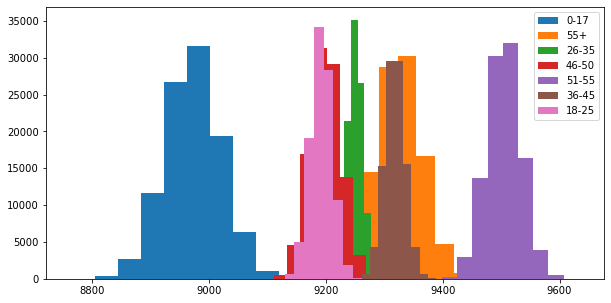

In [71]:
plt.figure(figsize=(10,5))
for i in l:
    plt.hist(age_SampleMean[i] , label = i)
plt.legend(loc='best')
plt.show()

### Spending Male vs Female

- As per below data we can clearly see for per trasaction male spend more than female.This might be due to spending age group 51-55 contains more male customers which increases the possibility of male customers to spend more and as well as in all age caategory group

#### Male
- Confidence Interval for 90 percent is (9416.72 , 9446.53)
- Confidence Interval for 95 percent is (9413.87 , 9449.38)
- Confidence Interval for 99 percent is (9408.29 , 9454.96)

#### Female
- Confidence Interval for 90 percent is (8718.13 , 8766.94)
- Confidence Interval for 95 percent is (8713.45 , 8771.62)
- Confidence Interval for 99 percent is (8704.32 , 8780.75)


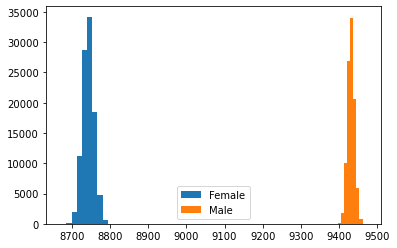

In [89]:
plt.hist(transactions_mean_female , label='Female')
plt.hist(transactions_mean_male , label = 'Male')
plt.legend(loc = 'best')
plt.show()